In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\hnyawate\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data=pd.read_csv('projo.csv')
data.head()

,gender,age,course,L_explain,L_avail,C_ref,L_exam,C_dept,C_incorporated,T_net,I_interclass,I_inquire,I_consult,L_covers,T_comp,SATISFIED
0,M,24.0,STASTISTICS,4,4,2,3,1,2,4,3,4,2,4,1,YES
1,M,22.0,MATHS_COMP,4,5,2,5,4,1,1,5,5,5,5,2,YES
2,M,19.0,BBIT,4,4,2,4,2,2,2,4,4,4,4,3,YES
3,F,18.0,MINING,4,4,5,5,3,1,2,4,1,4,5,5,YES
4,M,19.0,BCOM,3,4,4,4,2,1,1,4,4,4,3,2,NO


In [4]:
print(list(data.columns))

['gender', 'age', 'course', 'L_explain', 'L_avail', 'C_ref', 'L_exam', 'C_dept', 'C_incorporated', 'T_net', 'I_interclass', 'I_inquire', 'I_consult', 'L_covers', 'T_comp', 'SATISFIED']


In [5]:
data['SATISFIED'].value_counts()

YES    541
NO     207
Name: SATISFIED, dtype: int64

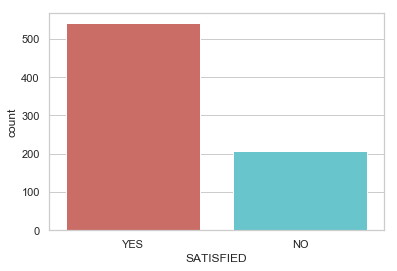

In [7]:
sns.countplot(x='SATISFIED',data=data,palette='hls')




In [8]:
count_no_sub = len(data[data['SATISFIED']=='YES'])
count_sub = len(data[data['SATISFIED']=='NO'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of non-satisfied students is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of satisfied students", pct_of_sub*100)

percentage of non-satisfied students is 72.32620320855615
percentage of satisfied students 27.67379679144385


In [9]:
data.groupby('SATISFIED').mean()

,age,L_explain,L_avail,C_ref,L_exam,C_dept,C_incorporated,T_net,I_interclass,I_inquire,I_consult,L_covers,T_comp
SATISFIED,,,,,,,,,,,,,
NO,22.347826,2.550725,2.463768,2.072464,3.647343,2.091787,2.144928,2.280193,3.429952,3.072464,2.690821,3.512077,1.874396
YES,22.416667,3.809612,3.959335,3.556377,4.146026,3.730129,3.731978,3.829945,4.044362,4.038817,3.951941,4.151571,3.632163


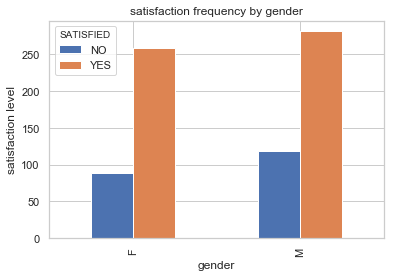

In [10]:
#Visualizations

%matplotlib inline
pd.crosstab(data.gender,data.SATISFIED).plot(kind='bar')
plt.title('satisfaction frequency by gender')
plt.xlabel('gender')
plt.ylabel('satisfaction level')
plt.savefig('association of gender and satisfaction')

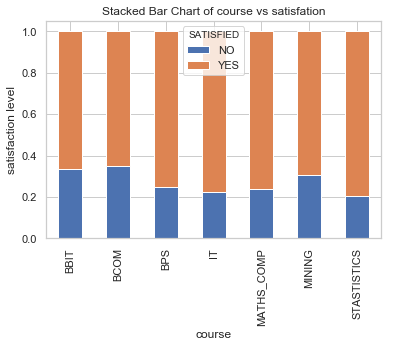

In [11]:
#The level of datisfaction  does not depends on the course. Thus, the course cannot be a good predictor of the outcome variable.
#since all the course diplay similar satisfaction proportions although slightly different
table=pd.crosstab(data.course,data.SATISFIED)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of course vs satisfation')
plt.xlabel('course')
plt.ylabel('satisfaction level')
plt.savefig('course vs satisfaction')

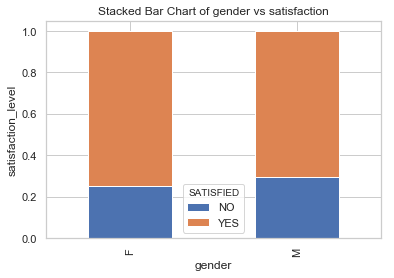

In [14]:
#The gender does not seem to be a strong predictor for the outcome variable.

table=pd.crosstab(data.gender,data.SATISFIED)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of gender vs satisfaction')
plt.xlabel('gender')
plt.ylabel('satisfaction_level')
plt.savefig('gender_vs_satisfaction')

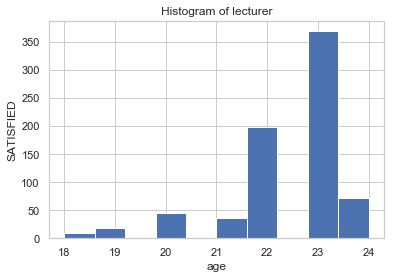

In [16]:
#age can be agood predictor , here older students tend to be satisfied
data.age.hist()
plt.title('Histogram of lecturer')
plt.xlabel('age')
plt.ylabel('SATISFIED')
plt.savefig('hist_lec')

In [97]:
# X = data.loc[:, data.columns != ('SATISFIED')]
X=data[['L_explain', 'L_avail', 'C_ref', 'L_exam','C_dept', 'C_incorporated', 'T_net', 'I_interclass', 'I_inquire','I_consult', 'L_covers', 'T_comp']]
y = data.loc[:, data.columns == 'SATISFIED']



In [64]:
data.columns

Index(['gender', 'age', 'course', 'L_explain', 'L_avail', 'C_ref', 'L_exam',
       'C_dept', 'C_incorporated', 'T_net', 'I_interclass', 'I_inquire',
       'I_consult', 'L_covers', 'T_comp', 'SATISFIED'],
      dtype='object')

In [117]:
y.head()

,SATISFIED
0,YES
1,YES
2,YES
3,YES
4,NO


In [119]:
# from sklearn.preprocessing import LabelEncoder

# y = LabelEncoder().fit_transform(y)
# y[:5]



array([1, 1, 1, 1, 0], dtype=int64)

In [120]:
# import numpy as np
# import pandas as pd

# k=data.loc[data.head, 'SATISFIED']

In [121]:
X.head()

,L_explain,L_avail,C_ref,L_exam,C_dept,C_incorporated,T_net,I_interclass,I_inquire,I_consult,L_covers,T_comp
0,4,4,2,3,1,2,4,3,4,2,4,1
1,4,5,2,5,4,1,1,5,5,5,5,2
2,4,4,2,4,2,2,2,4,4,4,4,3
3,4,4,5,5,3,1,2,4,1,4,5,5
4,3,4,4,4,2,1,1,4,4,4,3,2


In [122]:
data=data.dropna()

In [123]:
data.isnull().count()

gender            747
age               747
course            747
L_explain         747
L_avail           747
C_ref             747
L_exam            747
C_dept            747
C_incorporated    747
T_net             747
I_interclass      747
I_inquire         747
I_consult         747
L_covers          747
T_comp            747
SATISFIED         747
dtype: int64

In [129]:

# from imblearn.over_sampling import SMOTE

# os = SMOTE(random_state=0)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

# os_data_X,os_data_y=os.fit_sample(X_train, y_train)
# os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
# os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# # we can Check the numbers of our data

# # print("length of oversampled data is ",len(os_data_X))
# print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['SATISFIED']==0]))
# print("Number of subscription",len(os_data_y[os_data_y['SATISFIED']==1]))
# print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['SATISFIED']==0])/len(os_data_X))
# print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['SATISFIED']==1])/len(os_data_X))

y_test[:5], y_train[:5]

(array([0, 1, 1, 1, 1], dtype=int64), array([1, 1, 0, 1, 1], dtype=int64))

In [125]:
# #Recursive Feature Elimination

# #Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

# data_vars=data.columns.values.tolist()
# y=['y']
# X=[i for i in data_vars if i not in y]

# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# logreg = LogisticRegression()

# rfe = RFE(logreg, 20)
# rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
# print(rfe.support_)
# print(rfe.ranking_)


# cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
#       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
#       'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
# X=os_data_X[cols]
# y=os_data_y['y']


In [126]:
X_train.head()

,L_explain,L_avail,C_ref,L_exam,C_dept,C_incorporated,T_net,I_interclass,I_inquire,I_consult,L_covers,T_comp
242,5,5,5,5,5,5,5,5,5,5,5,5
534,5,5,5,5,5,5,5,5,5,5,5,5
316,2,1,2,4,1,1,1,4,1,1,4,1
12,1,4,3,4,5,5,4,4,4,4,5,4
161,4,3,4,4,3,4,4,4,3,4,3,4


In [127]:
# Logistic
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

lr=DecisionTreeClassifier()
lr_fit=lr.fit(X_train, y_train)
lr_pred=lr_fit.predict(X_test)
print(lr_pred)

accuracy_score(lr_pred,y_test)

[0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1
 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1]


0.9555555555555556

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0
 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 0 1]


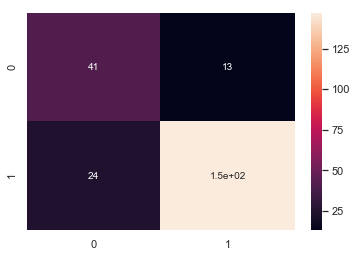

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

lr=LogisticRegression()
lr_fit=lr.fit(X_train, y_train)
lr_pred=lr_fit.predict(X_test)
lr_proba = lr_fit.predict_proba(X_test)
print(lr_pred)

accuracy_score(lr_pred,y_test)
log_loss(y_test, lr_proba)

# confusion_matrix(lr_pred, y_test)

sns.heatmap(confusion_matrix(lr_pred, y_test), annot=True)

In [138]:
cm=np.array(confusion_matrix(y_test,lr_pred,labels=[1,0]))
confusion=pd.DataFrame(cm,index=['satisfied','not-satisfied'],columns=['predicted_satisfied','predicted_not-satisfied'])
confusion

,predicted_satisfied,predicted_not-satisfied
satisfied,147,13
not-satisfied,24,41


In [140]:
import statsmodels.api as sm 
import numpy as np
# X = np.random.normal(0, 1, (100, 3)) 
# y = np.random.choice([0, 1], 100) 
res = sm.Logit(lr_pred, y_test).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.400642
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  225
Model:                          Logit   Df Residuals:                      224
Method:                           MLE   Df Model:                            0
Date:                Fri, 25 Jan 2019   Pseudo R-squ.:                  0.2730
Time:                        17:39:00   Log-Likelihood:                -90.144
converged:                       True   LL-Null:                       -123.99
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.4255      0.289      8.382      0.000       1.858       2.993
==============================================================================
"""

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
classifier = LogisticRegression(random_state = 0, C=100)
classifier.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [151]:
import numpy as np

coef = classifier.coef_[0]

print(np.exp(coef))

[1.41324513 1.95529094 1.33738809 0.82151233 1.58837876 0.96962506
 1.43546097 0.87265105 0.90128523 1.28373741 1.24701763 1.51389836]


In [111]:
from sklearn.ensemble import RandomForestClassifier

lr=RandomForestClassifier()
lr_fit=lr.fit(X_train, y_train)
lr_pred=lr_fit.predict(X_test)
print(lr_pred)

accuracy_score(lr_pred,y_test)

C:\Users\hnyawate\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


['NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES'
 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES'
 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES'
 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES'
 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO'
 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO'
 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO'
 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO'
 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'Y

C:\Users\hnyawate\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9822222222222222

In [113]:
from sklearn.svm import SVC
from sklearn import metrics

lr=SVC()
lr_fit=lr.fit(X_train, y_train)
lr_pred=lr_fit.predict(X_test)
# lr_prob = lr_fit.predict_proba(X_test)
print(lr_pred)

accuracy_score(lr_pred,y_test)
# log_loss(lr_prob, y_test)

C:\Users\hnyawate\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: predict_proba is not available when  probability=False

In [ ]:
# #Implementing the model

# import statsmodels.api as sm
# logit_model=sm.Logit(X,y)
# result=logit_model.fit(X,y)
# print(result.summary2())

In [ ]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 
      'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())



In [ ]:
#Logistic Regression Model Fitting

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)



In [ ]:
#Predicting the test set results and calculating the accuracy

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))



In [ ]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)



In [ ]:
# Compute precision, recall, F-measure and support

# To quote from Scikit Learn:

# The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

# The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

# The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

# The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

# The support is the number of occurrences of each class in y_test.

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


# Interpretation: Of the entire test set, 74% of the promoted term deposit were the term deposit that the customers l
#iked. Of the entire test set, 74% of the customer’s preferred term deposits that were promoted.



In [ ]:


# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

plt.show()

